In [1]:
import pandas as pd

class IrisIterator:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
        self.index = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index >= len(self.df):
            raise StopIteration
        else:
            row = self.df.iloc[self.index]
            self.index += 1
            return row[:-1].values.tolist(), row[-1]

In [2]:
iris = IrisIterator('IRIS.csv')

In [3]:
next(iris)

([5.1, 3.5, 1.4, 0.2], 'Iris-setosa')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

class DataStats:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)
    
    def basic_stats(self):
        return self.df.describe()
    
    def available_variables(self):
        return list(self.df.columns)
    
    def variable_stats(self, variable_name):
        if variable_name not in self.available_variables():
            return "Variable not available in the dataset"
        else:
            var_stats = {}
            var_data = self.df[variable_name]
            var_stats["mean"] = var_data.mean()
            var_stats["median"] = var_data.median()
            var_stats["std_dev"] = var_data.std()
            var_stats["q25"] = var_data.quantile(0.25)
            var_stats["q50"] = var_data.quantile(0.50)
            var_stats["q75"] = var_data.quantile(0.75)
            
            plt.hist(var_data, bins=10)
            plt.title("Histogram of "+variable_name)
            plt.xlabel(variable_name)
            plt.ylabel("Frequency")
            plt.show()
            
            return var_stats

In [6]:
data = DataStats('IRIS.csv')

In [8]:
data.basic_stats()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.available_variables()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

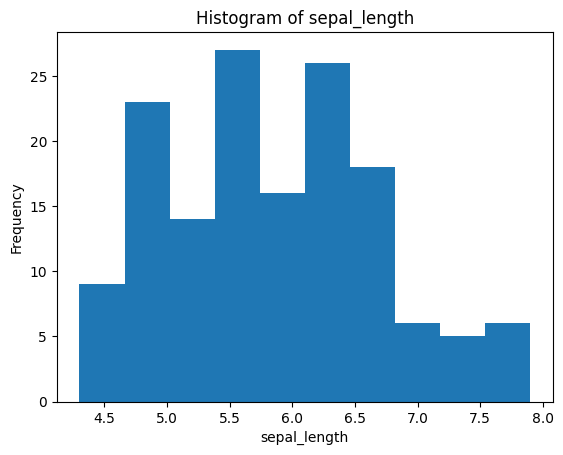

{'mean': 5.843333333333334,
 'median': 5.8,
 'std_dev': 0.828066127977863,
 'q25': 5.1,
 'q50': 5.8,
 'q75': 6.4}

In [10]:
data.variable_stats('sepal_length')